# Structural Dynamics
## Agenda
* Computational techniques for Structural Dynamics
* Constructing and using response spectra
* Python scientific computing environment

## Topics
* Free vibration response of SDOF systems
  * Undamped SDOF system
  * Underdamped system
* Forced vibration response of underdamped SDOF systems
  * Steady state response under harmonic excitation
  * Response under arbitrary excitation
  * Response under support motion
* Response spectra
  * Constructing response spectra
  * Constructing design response spectra
  * Using design response spectra
  
## Free Vibration Response of Undamped SDOF System

An SDOF system vibrates freely when excited by an initial disturbance, which may consist of an initial displacement, an initial velocity or a combination of both. The frequency of free vibration of an undamped SDOF system is called its **natural frequency** and depends on its mass and stiffness, $\omega_n = \sqrt{\frac{k}{m}}$. The amplitude of the response is given by 
$A = \sqrt{x_0^2 + \left( \frac{\dot{x}_0}{\omega_n}  \right)^2}$ 
and the phase angle is given by $\phi = \tan^{-1} \left( \frac{\dot{x}_0}{x_0 \omega_n} \right)$. The free vibration response can then be written as $ x(t) = A \cos \left( \omega_n t - \phi \right)$.

k = 1545.66358557 m = 1552.79503106
wn = 0.997701031925
Amplitude = 11.1854971287 Pahse angle = 0.464568890368


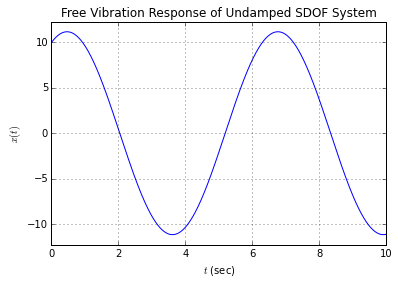

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
x0 = 10  # Initial displacement
v0 = 5   # Initial velocity

# System properties
I = np.pi / 64.0 * (120**4  - 96**4)  # Hollow circular section with given outer and inner dia
#print 'I =', I
L = 3600
k = 3.0 * 4e6 * I / L**3  # Stiffness of a cantilever beam
m = 6e5 / 386.4
print 'k =', k, 'm =', m
wn = np.sqrt(k / m)
print 'wn =', wn
A = np.sqrt(x0**2 + (v0 / wn)**2)
if (x0 * wn) != 0:
    phi = np.arctan(v0 / (x0 * wn))
else:
    phi = np.pi / 2.0
print 'Amplitude =', A, 'Pahse angle =', phi

# Response
tmin = 0
tmax = 10
t = np.linspace(tmin, tmax, 1001)
x = A * np.cos(wn * t - phi)

# Plot of response
plt.plot(t, x)
plt.axis([ tmin, tmax, -1.1*A, 1.1*A])
plt.grid()
plt.xlabel('$t$ (sec)')
plt.ylabel('$x(t)$')
plt.title('Free Vibration Response of Undamped SDOF System')
plt.show()

m = 1552.79503106 k = 1545.66358557


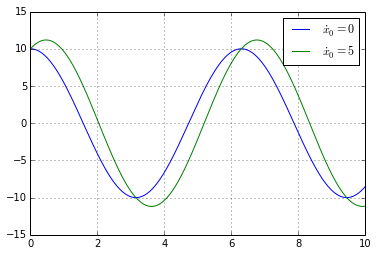

In [6]:
def undamped_freevib(m, k, x0, v0):
    wn = np.sqrt(k / m)
    A = np.sqrt(x0**2 + (v0 / wn)**2)
    if (x0 * wn) != 0:
        phi = np.arctan(v0 / (x0 * wn))
    else:
        phi = np.pi / 2.0
    return wn, A, phi

print 'm =', m, 'k =', k
x0 = 10
v0 = 0
wn1, A1, phi1 = undamped_freevib(m, k, x0, v0)
x0 = 10
v0 = 5
wn2, A2, phi2 = undamped_freevib(m, k, x0, v0)
tmin = 0
tmax = 10
t = np.linspace(tmin, tmax, 1001)
x1 = A1 * np.cos(wn1 * t - phi1)
x2 = A2 * np.cos(wn2 * t - phi2)
plt.plot(t, x1, label='$\dot{x}_0 = 0$')
plt.plot(t, x2, label='$\dot{x}_0 = 5$')
plt.grid()
plt.legend()
plt.show()

## Free Vibration Response of a Damped SDOF System

The damping property of a vibrating system is represented as its damping ratio, $\xi$. The critical damping coefficient of a vibrating system is given as $c-c = 2 \sqrt{km}$. Damping ratio of a system is the ratio of its actual damping coefficient to the critical damping coefficient calculated based on its stiffness and mass. If $\xi = 1$, system is said to be critically damped, if $\xi > 1$, system is said to be overdamped and if $\xi < 1$, system is said to be underdamped. Most systems in structural dynamics are underdamped since they are constructed of materials whose damping coefficient is low. For example, damping ration of steel structures is usually around 2% and of reinforced concrete structures is around 5%.

The frequency of vibration of a damped SDOF system is called the damped natural frequency and is given as $\omega_d = \sqrt{1 - \xi^2} \, \omega_n$. Thus, damped natural frequency is always less than the natural frequency and the two are almost same for small values of damping ratio. The amplitude of free vibration of a damped system is given as $A = \sqrt{x_0^2 + \left( \frac{\dot{x}_0 + \xi \, \omega_n x_0}{\omega_d}  \right)^2}$. The phase angle is $\phi = \tan^{-1} \left( \frac{\dot{x}_0 + \xi \, \omega_n x_0}{x_0 \omega_d} \right)$. The free vibration response is given as $x(t) = e^{-\xi \omega_n t} \sqrt{x_0^2 + \left( \frac{\dot{x}_0 + \xi \omega_n x_0}{\omega_d}  \right)^2} \cos \left( \omega_d t - \phi \right)$.

k = 1545.66358557 m = 1552.79503106
wn = 0.997701031925 wd = 0.996453125206


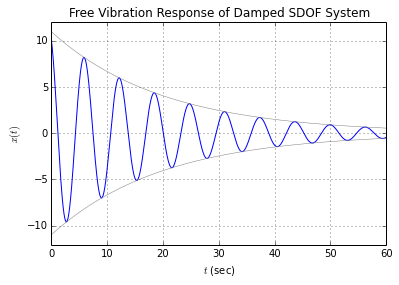

In [7]:
def damped_freevib(m, c, k, x0, v0):
    wn = np.sqrt(k / m)
    xi = c / (2.0 * np.sqrt(k * m))
    wd = np.sqrt(1.0 - xi**2) * wn
    A = np.sqrt(x0**2 + ((v0 + xi * wn * x0) / wd)**2)
    if (x0 * wd) == 0:
        phi = np.pi / 2.0
    else:
        phi = np.arctan((v0 + xi * wn * x0 ) / (x0 * wn))
    return wn, wd, A, phi

x0 = -10  # Initial displacement
v0 = 5    # Initial velocity

# System properties
I = np.pi / 64.0 * (120**4  - 96**4)
#print 'I =', I
L = 3600
k = 3.0 * 4e6 * I / L**3
m = 6e5 / 386.4
xi = 0.05
ccr = 2.0 * np.sqrt(k * m)
c = xi * ccr

wn, wd, A, phi = damped_freevib(m, c, k, x0, v0)
print 'k =', k, 'm =', m
print 'wn =', wn, 'wd =', wd
tmin = 0
tmax = 60
t = np.linspace(tmin, tmax, 60001)
x = np.exp(-xi * wn * t) * A * np.cos(wn * t - phi)
plt.plot(t, x)
plt.plot(t, np.exp(-xi * wn * t)*A, t, -np.exp(-xi*wn*t)*A, color=(0.5,0.5,0.5), linewidth=0.5)
plt.axis([ tmin, tmax, -1.1*A, 1.1*A])
plt.grid()
plt.xlabel('$t$ (sec)')
plt.ylabel('$x(t)$')
plt.title('Free Vibration Response of Damped SDOF System')
plt.show()

## Steady State Response of an Underdamped SDOF System subjected to Harmonic Excitation

When a system is subjected to harmonic excitation, the response at the start is governed by the system properties, initial conditions and the external excitation. But after sufficient time has elapsed, the contribution to the total response made by the initial conditions is negligibly small and the response mainly depends on the external excitation. This response is called steady state response.

The frequency of steady state response is the same as the excitation frequency. Amplitude of response depends on the amplitude of excitation force and system properties.

r = 0.8 DAF = 2.71163072273


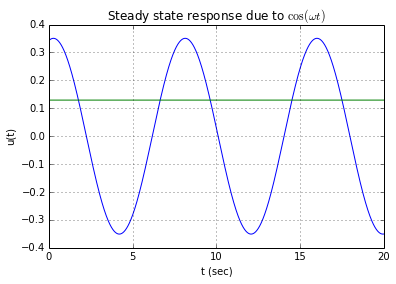

In [8]:
w = 0.8 * wn
r = w / wn

F0 = 200
x_st = F0 / k
daf = 1.0 / np.sqrt((1.0 - r**2)**2 + (2.0*xi*r)**2)
print 'r =', r, 'DAF =', daf

tmin = 0
tmax = 20.0
t = np.linspace(tmin, tmax, 20001)
f = F0 * np.cos(w * t)
phi = np.arctan(2.0*xi*r / (1.0 - r**2))
x = x_st * daf * np.cos(w*t - phi)
xx = np.ones(t.shape, dtype=float) * x_st
#plt.plot(t, f)
plt.plot(t, x)
plt.plot(t, xx)
plt.grid()
plt.xlabel('t (sec)')
plt.ylabel('u(t)')
plt.title('Steady state response due to $\cos(\omega t)$')
plt.show()

## Response of an Underdamped SDOF System subjected to Arbitrary Excitation

Response of a damped SDOF system subjected to arbitrary excitation can be computed in a number of ways. Duhamel integral gives a closed form solution which can be evaluated quite easily for undamped systems for a number of simple excitation functions. But evaluating the integral by hand becomes difficult for the case of damped systems and for complex excitation functions. Further, it is necessary that the excitation function be expressed in the form of a function to enable its integration. For excitation functions that are difficult to represent in the form of a function, or for excitation functions that are in digitized form, it is possible to evaluate the integral numerically.

Another approach is to implement a numerical recurrence formula, such as, Newmark's method. It is also possible to obtain the response using Runge-Kutta method.

    0.00       0.0000       0.0000       0.0000       0.0000       0.0000
    0.10       5.0000       5.0000      17.9905       0.8995       0.0300
    0.20       8.6603      36.5749      23.6571       2.9819       0.2193
    0.30      10.0000     102.8226      12.1377       4.7716       0.6166
    0.40       8.6603     185.6006     -12.7304       4.7420       1.1130
    0.50       5.0000     246.4983     -39.9433       2.1083       1.4782
    0.60       0.0000     243.8763     -56.0464      -2.6912       1.4625
    0.70       0.0000     158.6554     -33.0708      -7.1470       0.9514
    0.80       0.0000      21.2288       0.4884      -8.7761       0.1273
    0.90       0.0000    -115.9663      31.9500      -7.1542      -0.6954
    1.00       0.0000    -203.5791      50.1140      -3.0510      -1.2208
    0.00       0.0000       0.0000       0.0000       0.0000       0.0000
    0.10       5.0000     246.4983     -39.9433       2.1083       1.4782
    0.20       0.0000    -203.5791    

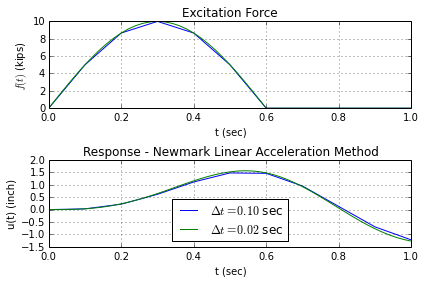

In [14]:
def newmark_beta(m, c, k, u0, v0, dt, p, gamma=0.5, beta=1.0/6.0):
    n = len(p)
    peff = np.zeros(n, dtype=float)
    u = np.zeros(n, dtype=float)
    v = np.zeros(n, dtype=float)
    a = np.zeros(n, dtype=float)
    u[0] = u0
    v[0] = v0
    a[0] = (p[0] - c * v[0] - k * u[0]) / m
    a1 = (1.0 / (beta * dt**2)) * m + (gamma / (beta * dt)) * c
    a2 = (1.0 / (beta * dt)) * m + ((gamma / beta) - 1.0) * c
    a3 = ((1.0 / (2.0 * beta)) - 1.0) * m + dt * (gamma / (2.0 * beta) - 1.0) * c
    #print a1, a2, a3
    keff = k + a1
    #print keff
    for i in range(n-1):
        i1 = i + 1
        # print p[i1], a1, u[i], a2, v[i], a3, a[i]
        peff[i1] = p[i1] + a1 * u[i]  + a2 * v[i] + a3 * a[i]
        u[i1] = peff[i1] / keff
        v[i1] = (gamma / (beta * dt)) * (u[i1] - u[i]) + \
                (1.0 - (gamma / beta)) * v[i] + dt * (1.0 - (gamma / (2.0*beta))) * a[i]
        a[i1] = (1.0 / (beta * dt**2)) * (u[i1] - u[i]) - \
                (1.0 / (beta * dt)) * v[i] - (1.0 / (2.0 * beta) - 1.0) * a[i]
    return (peff, u, v, a)

if __name__ == '__main__':
    '''
    Chopra, A.K., Dynamics of Structures, 4ed., Prentice Hall, 2012
    Example 5.1, pp. 169 - Numerical solution using linear interpolation of
                 excitation
    Example 5.4, pp. 178 - Newmark Linear Acceleration Method
    '''
    m = 0.2533  # kip-sec^2/in
    k = 10.0    # kips/in
    xi = 0.05   # xi = 0.05
    c = xi * 2.0 * np.sqrt(k * m)

    u0 = 0
    v0 = 0

    tmax = 1.0
    dt = 0.1
    n = int(tmax / dt) + 1
    n1 = (0.6 / dt) + 1
    t = np.linspace(0, tmax, n)
    p = np.zeros(n, dtype=float)
    p[:n1] = 10.0 * np.sin(np.pi * t[:n1] / 0.6)

    peff, u, v, a = newmark_beta(m, c, k, u0, v0, dt, p)
    for i in range(0, len(p), int(1.0 / dt / 10)):
        print "%8.2f %12.4f %12.4f %12.4f %12.4f %12.4f" % \
        (dt * i, p[i], peff[i], a[i], v[i], u[i])

    # Solve again, this time with dt = 0.02sec
    dt = 0.02
    n = int(tmax / dt) + 1
    n1 = (0.6 / dt) + 1
    t1 = np.linspace(0, tmax, n)
    p1 = np.zeros(n, dtype=float)
    p1[:n1] = 10.0 * np.sin(np.pi * t1[:n1] / 0.6)

    p1eff, u1, v1, a1 = newmark_beta(m, c, k, u0, v0, dt, p1)
    for i in range(0, len(p), int(1 / dt / 10)):
        print "%8.2f %12.4f %12.4f %12.4f %12.4f %12.4f" % \
        (dt * i, p[i], peff[i], a[i], v[i], u[i])

    plt.subplot(211)
    plt.plot(t, p)
    plt.plot(t1, p1)
    plt.xlabel('t (sec)')
    plt.ylabel('$f(t)$ (kips)')
    plt.title('Excitation Force')
    plt.grid()
    
    plt.subplot(212)
    plt.plot(t, u, label="$\Delta t=0.10$ sec")
    plt.plot(t1, u1, label="$\Delta t=0.02$ sec")
    plt.grid()
    plt.xlabel('t (sec)')
    plt.ylabel('u(t) (inch)')
    plt.legend(loc=8)
    plt.title('Response - Newmark Linear Acceleration Method')

    plt.tight_layout()
    plt.show()

With an algorithm and a program to compute the response time-history, we are now ready to construct a response spectrum. Here are some points to keep in mind before we get started:

1. When using a numerical method, such as Newmark $\beta$ method, it is important to remember that a numerical method is inherently approximate, will never exactly match the correct answer and may sometime be unstable. In fact, Newmark method is conditionally stable when $\beta = \frac{1}{2}$ and $\gamma = \frac{1}{6}$; it will be unstable if $\frac{dt}{T} > \frac{\sqrt{3}}{\pi}$, where $T$ is the natural period of the system.
2. The algorithm is for an SDOF system subjected to an external force applied to the mass, wherea we intend to develop a response spectrum for support motion.

It is therefore important to choose $dt$ sufficiently small and to modify the algorithm for support motion. Let the system properties by $m$, $c$ and $k$.

## Response of an SDOF System subjected to Support Motion

Let an SDOF system be subjected to a displacement of the support, defined by $x_s(t)$. The damping force is proportional to the relative velocity experienced by the two ends of the dashpot, $F_d(t) = c \, (\dot{x}(t) - \dot{x}_s(t))$. The spring force is proportional to the change in the length of the spring, $F_s = k \, (x(t) - x_s(t)$. The inertia force is equal to the product of mass and the acceleration experienced by the mass, $m \, \ddot{x}(t)$.

Then the equation of motion of the SDOF system is given as:

$m \, \ddot{x} + c \,(\dot{x} - \dot{x}_s) = k \,(x - x_s) = 0$

If we are interested in the relative displacement of the SDOF system with reference to its moving base, we can define the relative displacement as $z(t) = x(t) - x_s(t)$, so that relative velocity and relative acceleration are $\dot{z}(t) = \dot{x}(t) - \dot{x}_s(t)$ and $\ddot{z}(t) = \ddot{x}(t) - \ddot{x}_s(t)$, respectively. The equation of motion can now be rewritten as:

$m \, \ddot{z} + c \, \dot{z}(t) + k \, z(t) = -m \, \ddot{x}_s(t)$

This equation of motion is similar to the equation of motion of ann SDOF system subjected to an external force $f(t)$ applied directly on the mass $m$, which is:

$m \, \ddot{x}(t) + c \, \dot{x}(t) + k \, x(t) = f(t)$

Thus, the above algorithm developed for the case of an SDOF system subjected to an external force $f(t)$ applied on the mass can be used for the problem of support motion provided we replace the external force $f(t)$ with an equivalent force $-m \, \ddot{x}_s(t)$, which we can consider as the equivalent force exerted by the support motion.

To represent the force exerted by an earthquake on an SDOF system, we must know its acceleration time history and not its displacement time history. While it is possible to record the support displacement at a site with respect to time, and then compute the support acceleration, it would involve numerical computations, and possibly some errors introduced due to interpolation. However, earthquake records are recorded as acceleration time histories, which makes them more directly usable for computations of response time histories. But you must be aware that raw recorded acceleration time histories require a number of corrections before they can be used for respone computations. These corrections usually involve base line correction and corrections based on the properties of the accelerometer, because what the accelerometer records is the acceleartion of the mass inside the accelerometer whereas we are interested in the acceleration of the base of the accelerometer which is fixed to the surface of the ground.

Assuming corrected accelerograms are avialable, the above algorithm can be used by multiplying the accelerogram with $-m$ and using it as the external force applied on the mass. It must be remembered that, in this case, response is the relative displacement of the mass with respect to the moving support.


Number of points = 1560


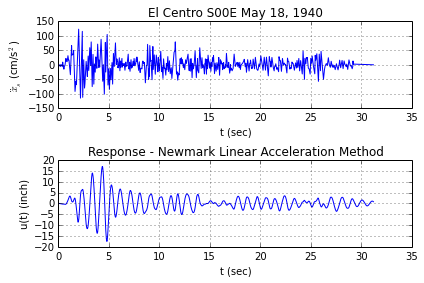

Positive maximum: 4.36 17.0194748997 Negative maximum: 4.82 -17.5155165109


In [10]:
# Response for El Centro S00E May 1940 acceleration record
# Acceleration record from http://nisee.berkeley.edu/data/strong_motion/a.k.chopra/

import pandas as pd

#widths = [12, 12, 12, 12, 12, 12]
#df = pd.read_fwf('elcentro_S00E_1940.dat', widths=widths, header=None)
widths = [10, 10, 10, 10, 10, 10, 10, 10]
df = pd.read_fwf('elcentro_akchopra.dat', widths=widths, header=None)
s = df.stack()
p = s.values
g = 386.09   # in/sec^2
p *= -g

dt = 0.02
t = np.arange(0, 0.02*(len(p)), dt)
peff, u, v, a = newmark_beta(m, c, k, u0, v0, dt, p)
print 'Number of points =', len(t)
plt.clf()
plt.subplot(211)
plt.plot(t, p)
ax = plt.axis()
ymax = max(abs(ax[2]), abs(ax[3]))
ax = (ax[0], ax[1], -ymax, ymax)
plt.axis(ax)
plt.grid()
plt.xlabel('t (sec)')
plt.ylabel('$\ddot{x}_s$ (cm/s$^2$)')
plt.title('El Centro S00E May 18, 1940')
plt.subplot(212)
plt.plot(t, u)
plt.grid()
plt.xlabel('t (sec)')
plt.ylabel('u(t) (inch)')
plt.title('Response - Newmark Linear Acceleration Method')

plt.tight_layout()
plt.show()
    
print 'Positive maximum:', np.argmax(u)*dt, max(u), 'Negative maximum:', np.argmin(u)*dt, min(u)

## Constructing Response Spectra

For the purpose of design, it is sufficient to know the maximum design force experienced by a vibrating system and it is not very important to know the entire response time-history. The maximum response experienced by an SDOF system depends the system properties and the external excitation force. 

A response spectrum is a graph showing the relationship between natural period of an SDOF system and the peak response it experiences. A response spectrum may be plotted for different values of damping ratio.

From the response spectrum, it is possible to determine the peak response if we know the natural period of the SDOF system and its damping ratio, thus completely avoiding the need for time-history analysis.

But it must be remembered that the response spectrum is specific to the excitation record that was used to generate the response spectrum. Thus the use of the response spectrum is limited because it cannot be used for excitation records other than the one which was used to generate it. This severely limits its use for design.

The peak response of greatest interest is the one which is directly usable. The spring force gives the force experienced by the structure during the earthquake and is given as follows:

$F_s(t) = k \, z(t) = m \, \frac{k}{m} \, z(t) = m \, \omega_n^2 \, z(t) = m A(t)$

where $A(t) = \omega_n^2 \, z(t) = \left( \frac{2 \, \pi}{T_n} \right)^2 z(t)$ has the units of acceleration and is called pseudo-acceleration. The response spectrum is thus a graph showing the variation of $\left( \frac{2 \pi}{T_n} \right)^2 max(|z(t)|)$ versus $T_n$. To compute the maximum force exerted by an earthquae on a structure, we must read the pseudo acceleration from the response spectrum (construced using the expected support acceleration record) and multiply that quantity with the mass of the system.

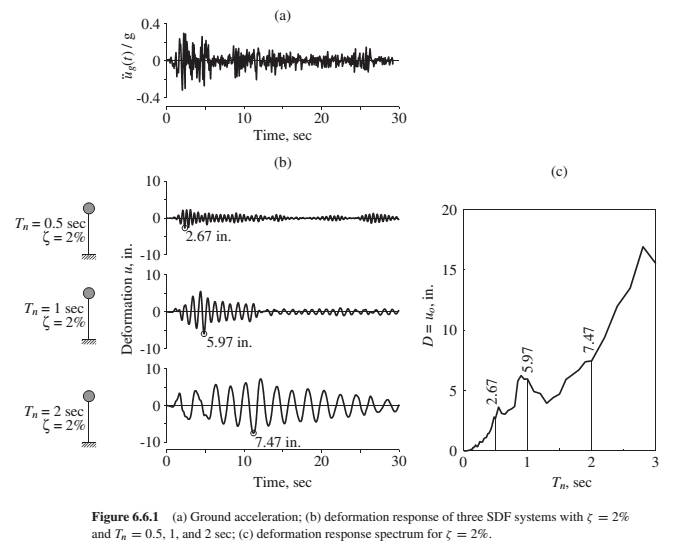

In [11]:
from IPython.core.display import Image 
Image(filename='akc_resp_spec.png')

## Constructing Design Spectra

For the response spectrum to be useful as a design tool, it must meet the following requirements:

1. Must be applicable to a wide range of excitation records
2. Must be applicable to a wide range of foundation strata, lateral load resisting systems
3. Must be applicable to MDOF systems

To address the first two issues, a design spectrum is constructed by choosing an ensemble of support acceleration records representing the maximum considered earthquake (MCE). The spectral values obtained from the different records in the ensemble are averaged. The resulting spectra vary in a non-smooth manner. These are then smoothed.

Usually, design spectra are also normalized with reference to the peak ground acceleration (PGA), which is the maximum ground acceleration of the support acceleration records. This makes the spectra independent of the units. If the spectra are normalized, you must remember to multiply the ordinate obtained from the spectrum with the PGA expected at the site.

An example of such an averaged, smoothed, normalized design spectrum is given in most seismic design codes, for example, IS1893 (Part 1):2002.

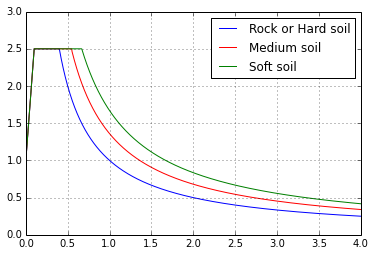

In [12]:
def is1893spectrum(t, soil='hard'):
    sa = np.zeros(len(t), dtype=float)

    if soil == 'hard':
        t1 = 0.1
        t2 = 0.4
        t3 = 4.0
        fact = 1.0
    elif soil == 'medium':
        t1 = 0.1
        t2 = 0.55
        t3 = 4.0
        fact = 1.36
    elif soil == 'soft':
        t1 = 0.1
        t2 = 0.67
        t3 = 4.0
        fact = 1.67
    else:
        return None

    for i in range(len(t)):
        if t[i] <= t1:
            sa[i] = 1.0 + 15.0 * t[i]
        elif t[i] <= t2:
            sa[i] = 2.5
        elif t[i] <= t3:
            sa[i] = fact / t[i]
    return sa

t = np.linspace(0.0, 4, 1001)
sa1 = is1893spectrum(t, soil='hard')
sa2 = is1893spectrum(t, soil='medium')
sa3 = is1893spectrum(t, soil='soft')

plt.plot(t, sa1, 'b-', label='Rock or Hard soil')
plt.plot(t, sa2, 'r-', label='Medium soil')
plt.plot(t, sa3, 'g-', label='Soft soil')
plt.legend()
plt.axis([0.0, 4.0, 0.0, 3.0])
plt.grid()
plt.show()

To estimate the peak design force in an MDOF system from a design spectrum requires additional concepts, called the modal combination rules.

## Using Design Spectra

### Steps in using Design Spectra

Using a design spectrum require the following sequence of steps:

1. Undamped free vibration analysis of structure to determine its natural frequencies and mode shapes
2. Identifying the number of modes to consider and determining the spectral accelerations of the selected modes
3. Combining the peak modal values using a suitable modal combination rule to estimate the peak response

#### Free Vibration Analysis
The equation of motion of an undamped MDOF system is as follows:

$[M] \{ \ddot{x} \} + [K] \{ x \} = \{ 0 \}$

Assuming free vibration response to be harmonic:

$\{x \} = \{ X \} \cos \omega t, \quad \{ \ddot{x} \} = -\omega^2 \{ X \}$

This leads to the formulation of the eigenvalue problem:

$- \omega^2 [M] \{ X \} + [K] \{ X \} = \{ 0 \}$

$\left( [K] - \omega^2 [M] \right) \{ X \} = \{ 0 \}$

$[M] \{ X \} = \frac{1}{\omega^2} [K] \{ X \}$

$[K]^{-1} [M] \{ X \} = \frac{1}{\omega^2} \{ X \}$

$[D] \{ X \} = \lambda \{ X \}$

Given the dynamical matrix $[D]$, eigensolution attempts to find $\{ X \}$ such that the above equation is satisfied.

In [13]:
from scipy.interpolate import interp1d

def getSa(t, soil='hard', xi=0.05):
    if soil == 'hard':
        if t <= 0.1:
            Sa = 1.0 + 15.0 * t
        elif t <= 0.4:
            Sa = 2.5
        elif t <= 4.0:
            Sa = 1.0 / t
        else:
            return None
    elif soil == 'medium':
        if t <= 0.1:
            Sa = 1.0 + 15.0 * t
        elif t <= 0.55:
            Sa = 2.5
        elif t <= 4.0:
            Sa = 1.36 / t
        else:
            return None
    elif soil == 'soft':
        if t <= 0.1:
            Sa = 1.0 + 15.0 * t
        elif t <= 0.67:
            Sa = 2.5
        elif t <= 4.0:
            Sa = 1.67 / t
        else:
            return None
    else:
        return None
    x = np.array([0.0, 0.02, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3], dtype=float)
    y = np.array([3.2, 1.4, 1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.5], dtype=float)
    f = interp1d(x, y)
    ynew = f(xi)
    return ynew * Sa

print getSa(2.5, xi=0.02, soil='medium')

0.7616


The equation to compute the design base shear, given in IS1893 (Part 1):2002 is:

$V_b = \frac{Z \, I}{2 \, R} \, \frac{S_a}{g} \, W$

The factor $V_b = \frac{Z \, I}{2 \, R} \, \frac{S_a}{g}$ is the normalized acceleration used to estimate the design seismic force. When this is multiplied with the seismic weight of the structure, we get the design seismic force.

Consider the design spectrum in IS1893 (Part 1):2002. There are three spectrum curves corresponding to three different foundation strata - rock or stiff soil, medium soil and soft soil. The spectrum is for 5% damping ratio and an expected peak ground acceleration of 1g. While calculating the spectral acceleration, a number of factors are applied to the value of $\frac{S_a}{g}$ obtained from the spectrum. Zone factor $Z$ accounts for the expected severity of ground motion for the geographical location of site under consideration. If the damping ratio is other than 5%, another factor is applied to compensate for the different damping ratio, increasing the value obtained from the design spectrum if the damping ratio of the system under consideration is less than 5% and decreasing it if it is more than 5%.

Other factors applied are the Response reduction factor $R$ and the Importance factor $I$. Response reduction factor $R$ attempts to decrease the design force such that the system responds inelastically under the action of a severe earthquake, but not too much that it collapses. Importance factor $I$ attempts to increase the design force so that it does not suffer as much damage as a normal structure. The factor $2$ in the denominator accounts for the fact that the Design basis earthquake (DBE) is half the Maximum considered earthquake (MCE). Since the design spectrum is constructed for the MCE, and the system is to be designed for DBE, we apply the factor $\frac{1}{2}$.

The design spectrum can now be used to design SDOF system. But estimating the design force for MDOF systems is still unresolved. This is done by choosing a suitable modal combination rule.

Let us imagine that the given MDOF system is divided into a number of SDOF systems, with natural periods equal to the natural periods of the MDOF system. If we can now determine the peak design force of each of these SDOF systems, modal combination rule will be able to estimate the peak response of the MDOF system.

The basic concept of modal combination is that if we can estimate the peak response of individual modes, we can combine those peak responses in a suitable way to obtain the most _**probable**_ peak response of the structure. The most commonly used modal combination rules are the following:

**Sum of absolute values (ABSSUM):**  Suitable when the structure has a few closely spaced modes.

$\lambda = \sum_{k=1}^r{|\lambda_k|}$

**Square root os sum of squares (SRSS):** Suitable when the structure has widely spaced modes.

$\lambda = \sqrt{\sum_{k=1}^r{\left( \lambda_k \right)^2}}$

**Complete quadratic combination (CQC):** Suitable under most circumstances.

$\lambda = \sqrt{\sum_{i=1}^{r} \sum_{j=1}^{r}{\lambda_i \, \rho_{ij} \, \lambda_j}}$

In the above equations, $r$ is the number of modes considered and $r \leq n$, where $n$ is the number of modes.

The design spectrum can now be used to estimate the value of $V_b$ corresponding to each natural period being considered. The last step remaining is to estimate the expected 

## Missing Links
* Assembling $[K]$ and $[M]$ for realistic 3D building models
* Computing $[C]$ for building models
* Performing dynamic analysis of damped 3D building models
* Performing nonlinear analysis of 3D building models

## Appendix

### Glossary

**Maximum considered earthquake (MCE)** is an earthquake that has a return period of 2500 years, which is an earthquake with a probability of occurence of 2% in 50 years

**Design basis earthquake (DBE)** is an earthquake that a structure is expected to safely withstand with repairable damage

## References
1. Chopra, A.K., *Dynamics of structures: Theory and applications to earthquake engineering*, 4ed., Prentice Hall, 2012

2. Housner, G.W. and Jennings, P.C., *Earthquake design spectra*, Earthquake Engineering Research Institute, MNO-4, 1982

3. Newmark, N.M and Hall, W.J., *Earthquake spectra and design*, Earthquake Engineering Research Institute, MNO-3, 1982

3. Nigam, N.C. and Jennings, P.C., Digital calculation of response spectra from strong-motion earthquake records, Earthquake Engineering Research Laboratory, California Institute of Technology, Pasadena, California, June 1968

4. Paz, M. and Leigh, W., *Structural dynamics - Theory and computation*, 5ed.,Kluwer Academic Publishers, 2004

5. Rao, S.S., *Mechanical vibrations*, 5ed., Prentice Hall, 2011

6. http://nisee.berkeley.edu/data/strong_motion/a.k.chopra/

7. http://www.vibrationdata.com/elcentro.htm

# Further Reading
1. Hart.C. and Wong, K., *Structural Dynamics for Structural Engineers*, John Wiley & Sons, Inc., New York, 2000